In [1]:
import pandas as pd
import filecmp
import os

In [2]:
screens = [
    'Human_InVitro_294T_Apobec_D14_Input.txt',
    'Human_InVitro_294T_TadA_D14_Input.txt',
    'Human_InVitro_SK-ES_Apobec_D14_Input.txt',
    'Human_InVitro_SK-ES_TadA_D17_Input.txt',
    'Human_InVitro_SW480_Apobec_D14_Input.txt',
    'Human_InVitro_SW480_TadA_D14_Input.txt',
    ]
workdir = '../tests'
input_gene = 'SETDB1'
input_uniprot = 'Q15047'

## preprocess_be_results.py (3.1)

In [4]:
from preprocess_be_results import parse_base_editing_results

Human_InVitro_294T_Apobec_D14_Input.txt
Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 5203.0 0.27775308830665546
Nonsense vs No mutation: 2506.0 0.2608706384740007
Nonsense vs Silent: 1803.0 0.24557416370880203
No mutation vs Silent: 10178.0 0.9214706032590196

Human_InVitro_294T_TadA_D14_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 8506.0 0.8707578845218364

Human_InVitro_SK-ES_Apobec_D14_Input.txt


/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/preprocess_be_results.py:224: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_InputGene_edits_list = pd.concat(df_inputgenes)


Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 5573.0 0.6324443593517178
Nonsense vs No mutation: 2678.0 0.5679899176749412
Nonsense vs Silent: 1925.0 0.5238232060741514
No mutation vs Silent: 10262.0 0.9847223016764184

Human_InVitro_SK-ES_TadA_D17_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 7643.0 0.11881211072193099


/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/preprocess_be_results.py:224: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_InputGene_edits_list = pd.concat(df_inputgenes)



Human_InVitro_SW480_Apobec_D14_Input.txt
Count of Missense rows: 282
Count of Silent rows: 109
Count of Nonsense rows: 33
Count of Splice site rows: 19
Count of Splice site rows: 168
Missense edits: 345
Silent edits: 122
Nonsense edits: 34
No_mutation edits: 168
Nonsense vs Missense: 2427.0 1.6984223621187785e-08
Nonsense vs No mutation: 1191.0 8.57141567900219e-08
Nonsense vs Silent: 746.0 1.208578432773731e-08
No mutation vs Silent: 10293.0 0.949670567871975

Human_InVitro_SW480_TadA_D14_Input.txt
Count of Missense rows: 334
Count of Silent rows: 94
Count of Nonsense rows: 2
Count of Splice site rows: 16
Count of Splice site rows: 151
Missense edits: 421
Silent edits: 114
Nonsense edits: 0
No_mutation edits: 151
No mutation vs Silent: 7227.0 0.025534008934151198



/Users/calvinxyh/Documents/GitHub/BEClust3D/beclust3d/preprocess_be_results.py:224: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_InputGene_edits_list = pd.concat(df_inputgenes)


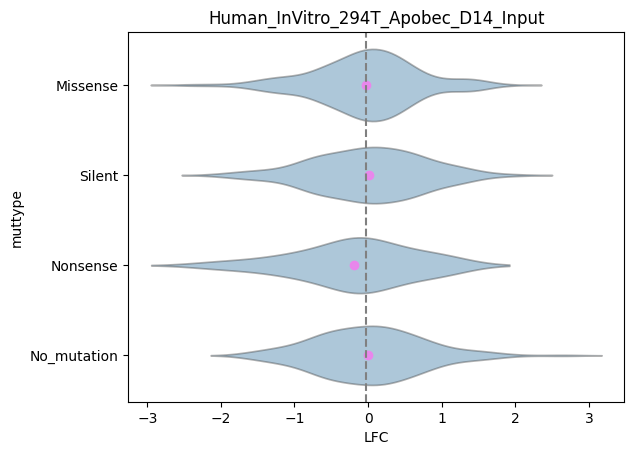

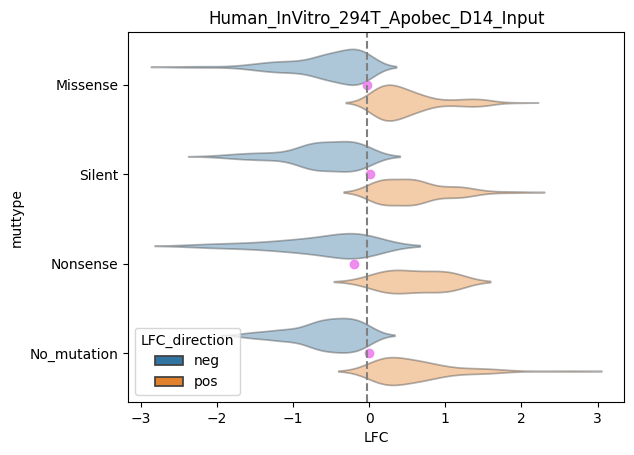

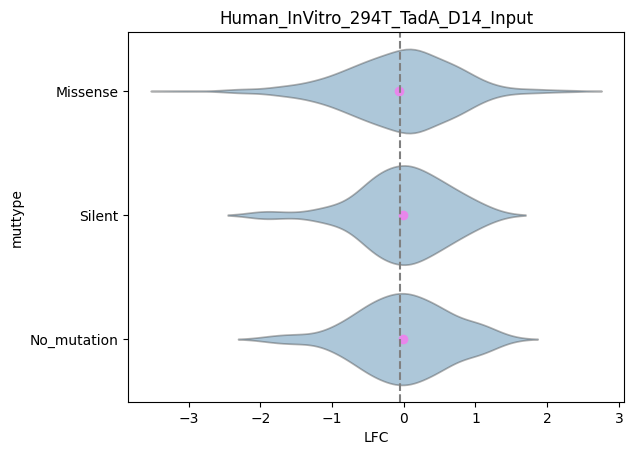

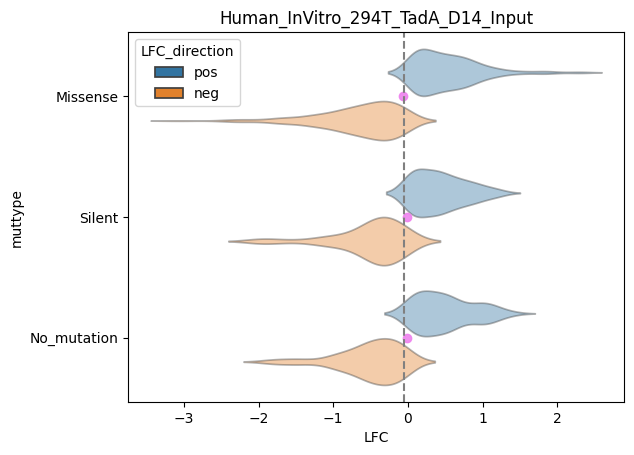

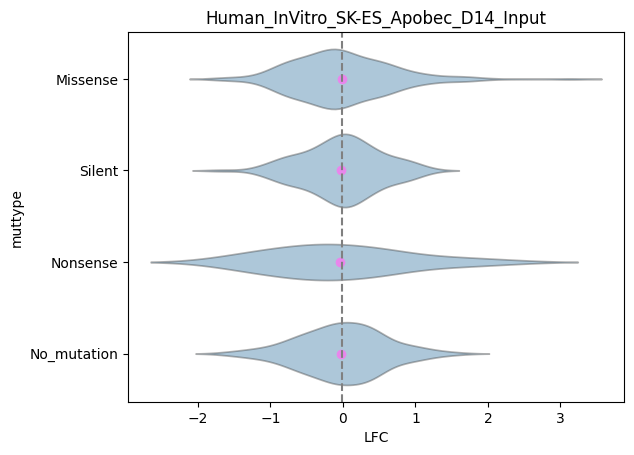

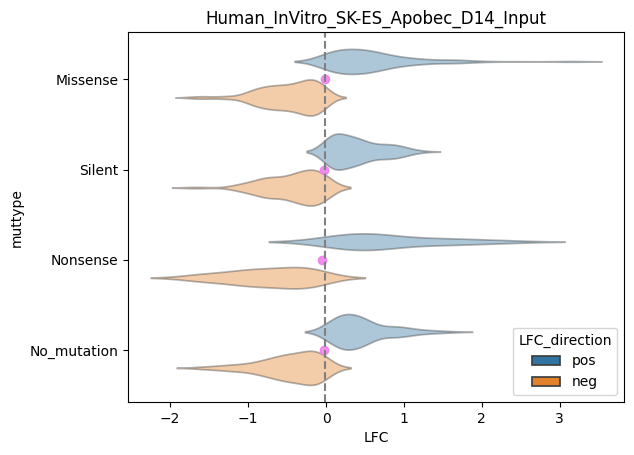

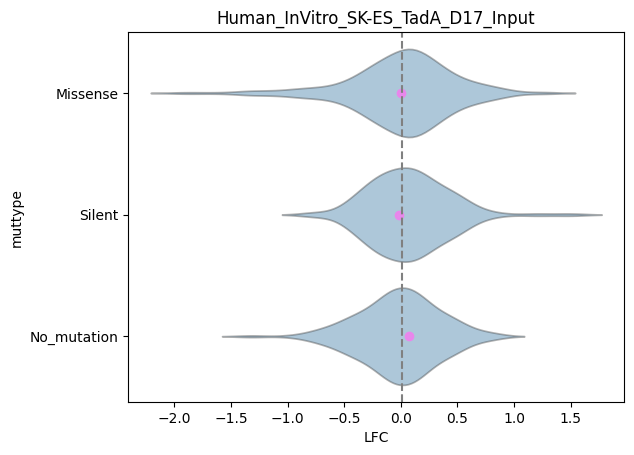

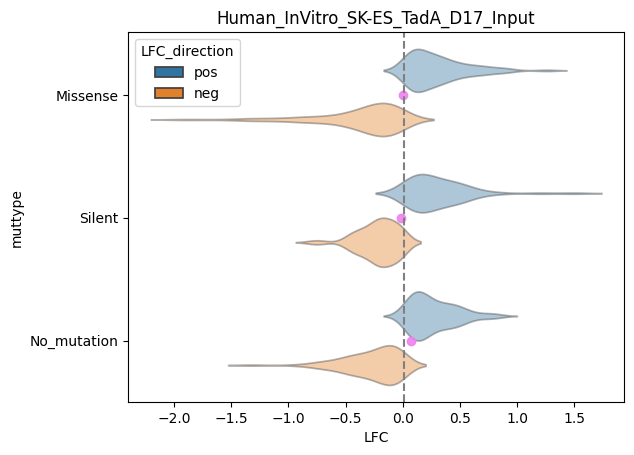

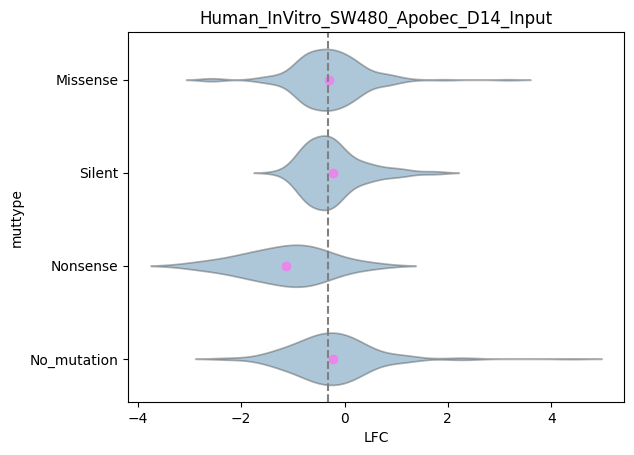

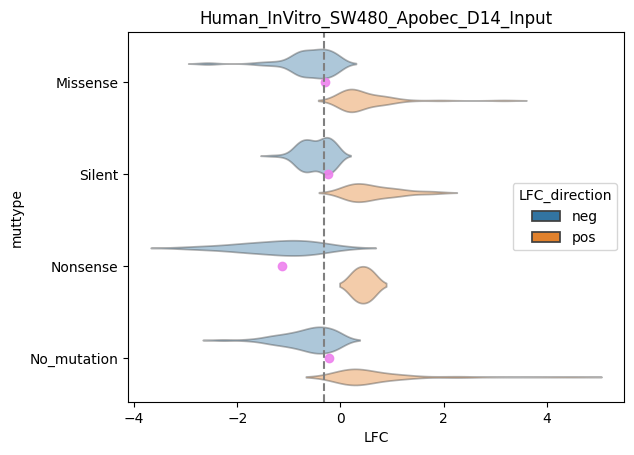

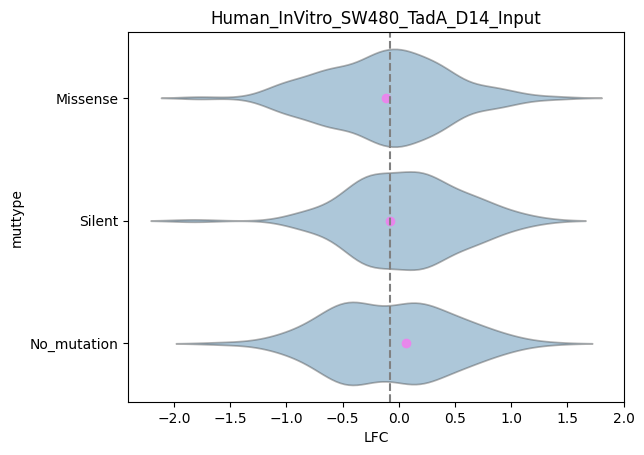

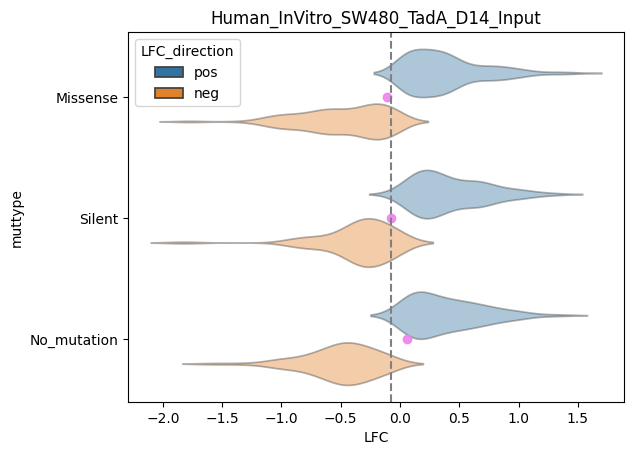

In [5]:
vals = ['D14_Input', 'D14_Input', 'D14_Input', 'D17_Input', 'D14_Input', 'D14_Input', ]

for screen, val in zip(screens, vals): 
    print(screen)
    df = pd.read_csv(workdir + '/rawdata/' + screen, sep='\t')
    parse_base_editing_results(df_InputGene = df, 
                               workdir      = workdir, 
                               input_gene   = input_gene, 
                               input_screen = screen, 
                               mut_col='Histogram_Category', val_col=val, 
                               gene_col='TargetGeneSymbol', edits_col='AminoAcidEdits',
                               )
    print()

In [8]:
# check output with previous output
for f in os.listdir('../tests/SETDB1/screendata'):
    path1 = '../tests/SETDB1/screendata/'+f
    path2 = '../tests/SETDB1/SETDB1/screendata/'+f
    if os.path.exists(path1) and os.path.exists(path2): 
        if not filecmp.cmp(path1, path2):
            print(f)
    else: 
        print('A file doesnt exist', path1)

## randomize_preprocessed_be_results.py (3.1.5)

In [9]:
from randomize_preprocessed_be_results import randomize_be_results

In [10]:
# this cell would take 2x time with original code

for screen in screens: 
    print(screen)
    screen = screen.split('.')[0]
    df = pd.read_csv(workdir + '/SETDB1/screendata/' + input_gene + '_' + screen + '_Missense_edits_list.tsv', sep='\t')
    randomize_be_results(df_missense=df, 
                         workdir=workdir, 
                         input_gene=input_gene, 
                         input_screen=screen)


Human_InVitro_294T_Apobec_D14_Input.txt
Human_InVitro_294T_TadA_D14_Input.txt
Human_InVitro_SK-ES_Apobec_D14_Input.txt
Human_InVitro_SK-ES_TadA_D17_Input.txt
Human_InVitro_SW480_Apobec_D14_Input.txt
Human_InVitro_SW480_TadA_D14_Input.txt


## conservation.py

In [3]:
from conservation import conservation

In [4]:
df_alignconserv, df_residuemap = conservation(workdir, 
                                              input_human_gene=input_gene, input_mouse_gene='Setdb1', 
                                              input_human_uniid=input_uniprot, input_mouse_uniid='D3YYC3', # O88974
                                              )

In [5]:
path1 = '../tests/SETDB1/HumanSETDB1_MouseSetdb1_align_conservation.tsv'
path2 = '../tests/SETDB1/SETDB1/HumanSETDB1_MouseSetdb1_align_conservation.tsv'
if os.path.exists(path1) and os.path.exists(path2): 
    if not filecmp.cmp(path1, path2):
        print(path1, path2)
    else: 
        print('Passed comparsion!')

path1 = '../tests/SETDB1/HumanSETDB1_MouseSetdb1_residuemap_conservation.tsv'
path2 = '../tests/SETDB1/SETDB1/HumanSETDB1_MouseSetdb1_residuemap_conservation.tsv'
if os.path.exists(path1) and os.path.exists(path2): 
    if not filecmp.cmp(path1, path2):
        print(path1, path2)
    else: 
        print('Passed comparsion!')

Passed comparsion!
Passed comparsion!


## af_structural_features.py

In [ ]:
# this is a requisite step to prioritizing by conservation

## prioritize_by_conservation.py (3.2)

In [3]:
from prioritize_by_conservation import prioritize_by_conservation

In [4]:
structureid = f"AF-{input_uniprot}-F1-model_v4"
df_struc = pd.read_csv(f"{workdir}/{input_gene}/{structureid}_coord_struc_features.tsv", sep = "\t")
df_consrv = pd.read_csv(f"{workdir}/{input_gene}/Human{input_gene}_MouseSetdb1_residuemap_conservation.tsv", sep = '\t')

for screen in screens: 
    prioritize_by_conservation(
        df_struc     =df_struc, 
        df_consrv    =df_consrv, 
        workdir      =workdir, 
        input_gene   =input_gene, 
        input_screen =screen, 
        structureid  =structureid, 
    )

In [7]:
test_files = [
              'SETDB1_Human_InVitro_294T_Apobec_D14_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_294T_TadA_D14_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_SK-ES_Apobec_D14_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_SK-ES_TadA_D17_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_SW480_Apobec_D14_Input_struc_consrv_proteinedits.tsv',
              'SETDB1_Human_InVitro_SW480_TadA_D14_Input_struc_consrv_proteinedits.tsv',
              ]
dir1 = '../tests/SETDB1/screendata/'
dir2 = '../tests/SETDB1/SETDB1/screendata/'

for file in test_files: 
    if not filecmp.cmp(dir1+file, dir2+file):
        print(file)
        with open(dir1+file, 'r') as file1:
            data1 = file1.read().replace('\n', '')
        with open(dir2+file, 'r') as file2:
            data2 = file2.read().replace('\n', '')
        # for d1, d2 in zip(data1, data2): 
        #     if d1 != d2: 
        #         print(d1, d2)
    else: 
        print('Passed comparsion!')

# files are not exactly the same
    # there are some discrepancies for capital lowercase, and order

SETDB1_Human_InVitro_294T_Apobec_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_294T_TadA_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SK-ES_Apobec_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SK-ES_TadA_D17_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SW480_Apobec_D14_Input_struc_consrv_proteinedits.tsv
SETDB1_Human_InVitro_SW480_TadA_D14_Input_struc_consrv_proteinedits.tsv


## randomize_by_conservation.py (3.2.5)

In [3]:
from randomize_by_conservation import randomize_by_conservation

In [5]:
structureid = f"AF-{input_uniprot}-F1-model_v4"

for screen in screens: 
    print(screen)
    randomize_by_conservation(
        workdir      =workdir, 
        input_gene   =input_gene, 
        input_screen =screen, 
        structureid  =structureid, 
    )

Human_InVitro_294T_Apobec_D14_Input.txt
Human_InVitro_294T_TadA_D14_Input.txt
Human_InVitro_SK-ES_Apobec_D14_Input.txt
Human_InVitro_SK-ES_TadA_D17_Input.txt
Human_InVitro_SW480_Apobec_D14_Input.txt
Human_InVitro_SW480_TadA_D14_Input.txt


## calculate_lfc3d.py (3.3)

## calculate_lfc3d.py